In [18]:
import numpy as np
from keras.models import load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
z_dim = 500
CGAN_models_path = "../results/CGAN_Adam/"
generator = load_model(CGAN_models_path + "G.hdf5")

In [45]:
def get_sentence_index(sentence="THE QUICK BROWN FOX JUMPS OVER A LAZY DOG"):
    indices = []
    for char in sentence:
        if char != " ":
            indices.append(ord(char) - 65)
    return indices

def get_sentence_labels(sentence="HELLO MY NAME IS MOHSEN"):
    char_idx = get_sentence_index(sentence)
    return to_categorical([char_idx], num_classes=26)

In [47]:
sentence = "HELLO MY NAME IS MOHSEN"
sent_length = len(sentence) - len(sentence.split(" ")) + 1
labels = get_sentence_labels(sentence)
labels = labels[0]
labels.shape

(19, 26)

In [49]:
sentence_image = np.ndarray(shape=(32, 32 * sent_length), dtype=np.float32)
for i in range(sent_length):
    character = labels[i]
    character = np.reshape(character, newshape=(1, -1))
    noise = np.random.normal(0.0, 1.0, size=(1, z_dim))
    fake_image = generator.predict([noise, character])
    fake_image = np.reshape(fake_image, newshape=(1, 32, 32, 1))
    sentence_image[:, 32*i:32*(i+1)] = fake_image[0, :, :, 0]

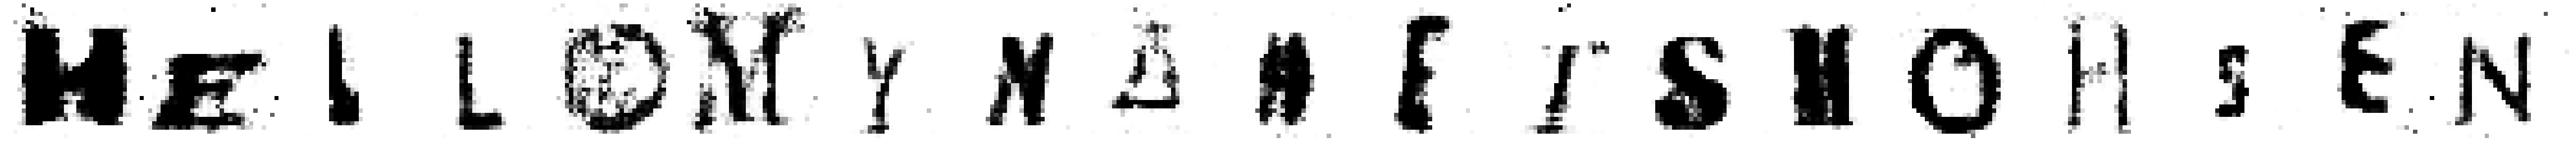

In [56]:
plt.close("all")
plt.figure(figsize=(5 * sent_length, 5))
plt.axis("off")
plt.imshow(sentence_image, cmap="gray")